# Bias-Variance Tradeoff in Machine Learning

## Introduction

The bias-variance tradeoff is a fundamental concept in machine learning that deals with the model's ability to generalize to new data. Understanding this tradeoff helps in building models that neither overfit nor underfit the data.

## Key Concepts

### Bias

Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

### Variance

Variance refers to the error introduced by the model's sensitivity to the small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data rather than the intended outputs (overfitting).

### Tradeoff

The bias-variance tradeoff is the balance between two sources of error that affect the generalization error of models:
- **High Bias**: Models are too simple, underfitting the data.
- **High Variance**: Models are too complex, overfitting the data.

The goal is to find the right balance between bias and variance to minimize the total error.

## Mathematical Formulation

The error when using a model \( \hat{f}(x) \) to approximate \( Y \) can be decomposed into three parts:
- **Bias Error**: Error from erroneous assumptions in the learning algorithm.
- **Variance Error**: Error from sensitivity to small fluctuations in the training set.
- **Irreducible Error**: Error that cannot be reduced by any model.

### Formula
\[ \text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error} \]

## Examples of High Bias and High Variance

### High Bias Example
- **Linear Regression** on a non-linear dataset.

### High Variance Example
- **Decision Trees** with very deep branches on a small dataset.

## Relation to Overfitting and Underfitting

- **Overfitting**: High variance, low bias.
- **Underfitting**: High bias, low variance.

## Bias-Variance Tradeoff in Different Models

### Regression
- Linear models typically have high bias but low variance.

### Classification
- Decision trees and k-nearest neighbors typically have high variance but low bias.

### Deep Learning
- Neural networks can have either high variance or high bias depending on their complexity and the amount of training data.

## Regularization Techniques

### L1 Regularization (LASSO)
Penalizes the absolute value of the coefficients, encouraging sparsity.

### L2 Regularization (Ridge)
Penalizes the square of the coefficients, encouraging smaller coefficients.


In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the function to generate custom polynomial data
def generate_custom_polynomial_data(n_samples, coeffs, noise=20, x_range=10, random_state=42):
    np.random.seed(random_state)
    X = np.random.rand(n_samples, 1) * 2 * x_range - x_range  # X values between -x_range and x_range
    y = np.zeros((n_samples, 1))
    
    for power, coeff in enumerate(coeffs):
        y += coeff * (X ** power)
    
    y += np.random.randn(n_samples, 1) * noise  # Adding noise
    return train_test_split(X, y, test_size=0.2, random_state=random_state)


# Define the function to plot the data
def plot_polynomial_data(X_train, X_test, y_train, y_test):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_test, y_test, color='red', label='Test data')
    plt.title('Custom Polynomial Data')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

---

**Example Question:**

You are required to generate a dataset for a high-degree polynomial function and plot the resulting data using the provided functions `generate_custom_polynomial_data` and `plot_polynomial_data`. Use the following parameters for the function:

1. **`coeffs`**: The coefficients of the polynomial terms, listed from the constant term to the highest-degree term.
   - Set `coeffs = [40, -5, 2, 4]`.
2. **`n_samples`**: The number of samples to generate.
   - Set `n_samples = 50`.
3. **`noise`**: The amount of noise to add to the data.
   - Set `noise = 500`.
4. **`x_range`**: The range for the X values, centered around 0 (i.e., X values will be between `-x_range` and `x_range`).
   - Set `x_range = 10`.

Use the following template code to set your parameters, generate the dataset, and plot the data:


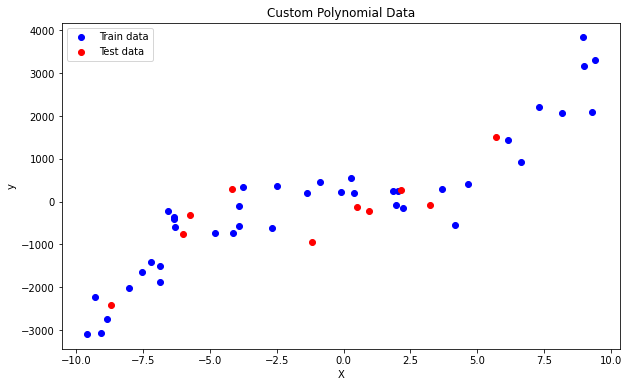

In [3]:
coeffs = [40, -5, 2, 4]  # Example coefficients for a high polynomial
n_samples = 50
noise = 500
x_range = 10
X_train, X_test, y_train, y_test = generate_custom_polynomial_data(n_samples, coeffs, noise, x_range)

# Plot the data using the plot function
plot_polynomial_data(X_train, X_test, y_train, y_test)


**Question 1:**

Generate a dataset with the following criteria and plot it using the provided functions:

- 100 samples
- Fit the quadratic function \( y = 3x^2 + 2x + 1 \)
- noise = 20

1. Save the training data as `X_train_low_poly` and `y_train_low_poly`.
2. Save the test data as `X_test_low_poly` and `y_test_low_poly`.
3. Use the provided functions `generate_custom_polynomial_data` and `plot_polynomial_data` to achieve this.

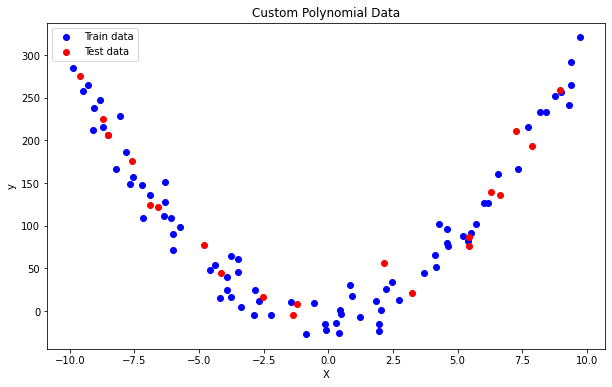

In [4]:
coeffs = [1, 2, 3, ]  # Example coefficients for a high polynomial
n_samples = 100
noise = 20
x_range = 10
X_train, X_test, y_train, y_test = generate_custom_polynomial_data(n_samples, coeffs, noise, x_range)

# Plot the data using the plot function
plot_polynomial_data(X_train, X_test, y_train, y_test)


**Question 2:**

Generate a dataset with the following criteria and plot it using the provided functions:

- 30 samples
- Fit the polynomial function \( y = 4x^5 - 2x + 10 \)
- noise = 100000
- range from -10 to 10

1. Save the training data as `X_train_high_poly` and `y_train_high_poly`.
2. Save the test data as `X_test_high_poly` and `y_test_high_poly`.
3. Use the provided functions `generate_custom_polynomial_data` and `plot_polynomial_data` to achieve this.


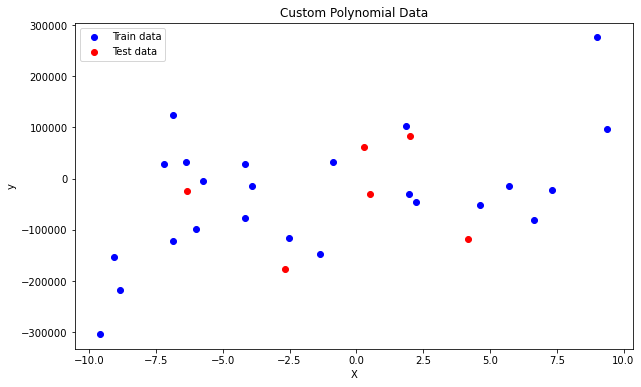

In [7]:
coeffs = [10, -2, 0, 0, 0, 4 ]  # Example coefficients for a high polynomial
n_samples = 30
noise = 100_000
x_range = 10
X_train, X_test, y_train, y_test = generate_custom_polynomial_data(n_samples, coeffs, noise, x_range)

# Plot the data using the plot function
plot_polynomial_data(X_train, X_test, y_train, y_test)


### Question Series: Understanding Bias-Variance Tradeoff with Polynomial Fits

#### Introduction

This series of questions will help you understand the bias-variance tradeoff when using polynomial fits for datasets. We'll start with an unregularized polynomial fit and then demonstrate the effects of Lasso and Ridge regularization. For each question, we'll use the datasets generated in the previous questions (`X_train_low_poly`, `X_test_low_poly`, `y_train_low_poly`, `y_test_low_poly` and `X_train_high_poly`, `X_test_high_poly`, `y_train_high_poly`, `y_test_high_poly`).

### Code Examples

1. **Unregularized Polynomial Fit**:
    ```python
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error

    def polynomial_fit(X_train, y_train, X_test, y_test, degree):
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_error = mean_squared_error(y_train, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        return train_error, test_error

    degree = 5  # Example degree
    train_error, test_error = polynomial_fit(X_train_low_poly, y_train_low_poly, X_test_low_poly, y_test_low_poly, degree)
    print(f'Train Error: {train_error}, Test Error: {test_error}')
    ```

2. **Polynomial Fit with Lasso Regularization**:
    ```python
    from sklearn.linear_model import Lasso

    def polynomial_fit_lasso(X_train, y_train, X_test, y_test, degree, alpha):
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = Lasso(alpha=alpha)
        model.fit(X_train_poly, y_train)
        
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_error = mean_squared_error(y_train, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        return train_error, test_error

    degree = 5  # Example degree
    alpha = 0.1  # Example alpha
    train_error, test_error = polynomial_fit_lasso(X_train_low_poly, y_train_low_poly, X_test_low_poly, y_test_low_poly, degree, alpha)
    print(f'Train Error: {train_error}, Test Error: {test_error}')
    ```

3. **Polynomial Fit with Ridge Regularization**:
    ```python
    from sklearn.linear_model import Ridge

    def polynomial_fit_ridge(X_train, y_train, X_test, y_test, degree, alpha):
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = Ridge(alpha=alpha)
        model.fit(X_train_poly, y_train)
        
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_error = mean_squared_error(y_train, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        return train_error, test_error

    degree = 5  # Example degree
    alpha = 0.1  # Example alpha
    train_error, test_error = polynomial_fit_ridge(X_train_low_poly, y_train_low_poly, X_test_low_poly, y_test_low_poly, degree, alpha)
    print(f'Train Error: {train_error}, Test Error: {test_error}')
    ```


In [46]:
# Define the function to plot the model output with sorted X values
def plot_model_output(X_train, y_train, X_test, y_test, y_train_pred, title, xlabel, ylabel):
    # Sort the training data and predictions by X values
    sorted_indices = np.argsort(X_train[:, 0])
    X_train_sorted = X_train[sorted_indices]
    y_train_pred_sorted = y_train_pred[sorted_indices]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_test, y_test, color='red', label='Test data')
    plt.plot(X_train_sorted, y_train_pred_sorted, color='green', label='Model fit')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()



**Question 3:**

Generate a dataset and fit a polynomial regression model based on the following criteria. Use the functions `generate_custom_polynomial_data` and `plot_model_output` provided earlier to create the dataset and plot the model output. Specifically, follow these steps:

1. Use the coefficients `[10, -2, 0, -1, 0, 0.4]` for the polynomial function \( y = 0.4x^5 - x^3 - 2x + 10 \).
2. Generate a dataset with:
   - `n_samples = 15`
   - `noise = 100000000`
   - `random_state = 42`
   - `x_range = 10`
3. Split the dataset into training and test sets using an 80/20 split.
4. Fit a polynomial regression model of degree 5 to the training data.
5. Calculate and print the mean squared errors for both the training and test sets.
6. Plot the model output using the `plot_model_output` function.
7. Print the coefficients of the fitted polynomial model.

Compare the polynomial coefficients of the fitted model with the original coefficients [10, -2, 0, -1, 0, 0.4]. How would you explain any differences observed?

Train Error: 5.0727468886349593e+79, Test Error: 5.545420485376949e+92


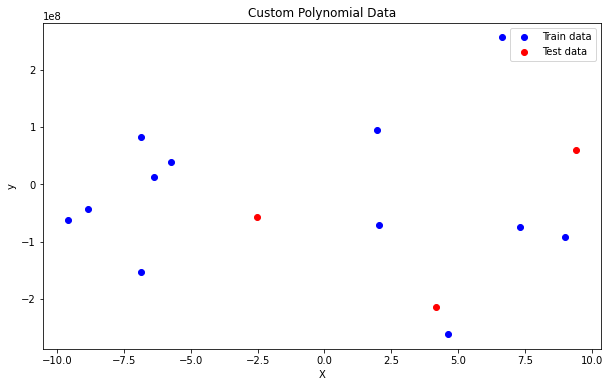

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def polynomial_fit(X_train, y_train, X_test, y_test, degree):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    return train_error, test_error

coeffs = [10, -2, 0, -1, 0, 0.4 ]  # Example coefficients for a high polynomial
n_samples = 15
noise = 100_000_000 
x_range = 10
X_train, X_test, y_train, y_test = generate_custom_polynomial_data(n_samples, coeffs, noise, x_range)

degree = 5  # Example degree
poly = PolynomialFeatures(degree)
X_train_low_poly = poly.fit_transform(X_train)
X_test_low_poly = poly.transform(X_test)
# y_train_low_poly = poly.fit_transform(y_train)
# y_test_low_poly = poly.transform(y_test)

# print(poly.coef_)
# TODO: What is print the coef_ attribute of the PolynomialFeatures object?

train_error, test_error = polynomial_fit(X_train_low_poly, y_train_low_poly, X_test_low_poly, y_test_low_poly, degree)
print(f'Train Error: {train_error}, Test Error: {test_error}')# Plot the data using the plot function
plot_polynomial_data(X_train, X_test, y_train, y_test)

In [45]:
X_train

array([[-5.75321779],
       [-6.88010959],
       [ 2.02230023],
       [ 4.63987884],
       [ 9.01428613],
       [-6.36350066],
       [-6.87962719],
       [ 7.32352292],
       [-9.58831011],
       [ 6.64885282],
       [ 1.97316968],
       [-8.83832776]])

**Question 4:**

1. Use the same dataset that you generated in Question 3
2. Fit a ridge regression model with a polynomial transformation of degree 5 to the training data using a lambda value (e.g., alpha = 0.1).
3. Calculate and print the mean squared errors for both the training and test sets.
4.  Plot the model output using the plot_model_output function.
5.  Print the coefficients of the fitted ridge regression model.



In [44]:
'''
1. Use the same dataset that you generated in Question 3
2. Fit a ridge regression model with a polynomial transformation of degree 5 to the training data using a lambda value (e.g., alpha = 0.1).
3. Calculate and print the mean squared errors for both the training and test sets.
4.  Plot the model output using the plot_model_output function.
5.  Print the coefficients of the fitted ridge regression model.
'''
from sklearn.linear_model import Ridge
r_model = Ridge(alpha=0.1, )
r_model.fit(X_train_low_poly, y_train)
y_train_pred = r_model.predict(X_train_low_poly)
y_test_pred  = r_model.predict(X_test_low_poly)
train_error  = mean_squared_error(y_train, y_train_pred)
test_error   = mean_squared_error(y_test, y_test_pred)
print(f'Train Error: {train_error}, Test Error: {test_error}')


Train Error: 1.3328616656068354e+16, Test Error: 5.27681431080185e+16


**Question 5:**

1. Use the same dataset that you generated in Question 3
2. Fit a ridge regression model with a polynomial transformation of degree 5 to the training data using the alpha values `[0.1, 1, 10, 100, 1000]`.
3. Calculate and print the mean squared errors for both the training and test sets for each alpha value.
4. Plot each model output using the `plot_model_output` function.

What do you observe about the model performance as the alpha value increases? Explain the relationship between the alpha value and the model performance.

# SVM Classification with the Wine Dataset

## Question 1: Load the Wine Dataset
**Explanation:** The Wine dataset is another classic dataset in machine learning. The first step is to load it.

**Task:** Write code to load the Wine dataset from scikit-learn.

*Hint:* Use the `load_wine` function from `sklearn.datasets` to load the dataset.

```python
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
print("Dataset loaded successfully!")
```

- `load_wine`: This function loads the Wine dataset, which includes data on different chemical properties of wines.
- `wine.data`: This attribute contains the features of the dataset.
- `wine.target`: This attribute contains the target labels (wine classes).

## Question 2: Explore the Dataset
**Explanation:** Understanding the structure of the dataset is important.

**Task:** Write code to print the shape of the data and target arrays.

*Hint:* After loading the dataset, the data can be accessed using the `data` attribute and the target labels using the `target` attribute.

```python
# Print the shape of the data and target arrays
print("Data shape:", X.shape)
print("Target shape:", y.shape)
```

- `X.shape`: This prints the dimensions of the feature matrix.
- `y.shape`: This prints the dimensions of the target array.

## Question 3: Visualize the Data
**Explanation:** Visualization helps in understanding the distribution and relationship of data.

**Task:** Write code to visualize the first two features of the Wine dataset using a scatter plot.

*Hint:* Use `matplotlib.pyplot` to create a scatter plot. Plot `X[:, 0]` on the x-axis and `X[:, 1]` on the y-axis, and use `y` for color coding the points.

```python
import matplotlib.pyplot as plt

# Scatter plot of the first two features
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title("Scatter plot of the first two features")
plt.show()
```

- `plt.scatter`: This function creates a scatter plot.
- `c=y`: Colors the points based on their target class.
- `wine.feature_names`: Names of the features in the dataset.

## Question 4: Split the Data into Training and Test Sets
**Explanation:** Splitting the dataset is essential for evaluating model performance.

**Task:** Write code to split the data into training and test sets.

*Hint:* Use `train_test_split` from `sklearn.model_selection` with `test_size=0.2` and `random_state=42` for reproducibility.

```python
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and test sets.")
```

- `train_test_split`: This function splits the dataset into training and test sets.
- `test_size=0.2`: Specifies that 20% of the data should be used for testing.
- `random_state=42`: Ensures reproducibility of the split.

## Question 5: Train an SVM Classifier
**Explanation:** Training a classifier is the core part of supervised learning.

**Task:** Write code to train an SVM classifier on the training data.

*Hint:* Use `SVC` from `sklearn.svm` with `kernel='linear'`.

```python
from sklearn.svm import SVC

# Train the SVM classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)
print("SVM classifier trained.")
```

- `SVC(kernel='linear')`: Creates an SVM classifier with a linear kernel.
- `clf.fit(X_train, y_train)`: Trains the classifier on the training data.
- `probability=True`: Enables probability estimates for the classifier.

## Question 6: Make Predictions
**Explanation:** After training, use the model to make predictions on new data.

**Task:** Write code to make predictions on the test set.

*Hint:* Use the `predict` method of the trained SVM classifier to make predictions.

```python
# Make predictions on the test set
y_pred = clf.predict(X_test)
print("Predictions made on the test set.")
```

- `clf.predict(X_test)`: Uses the trained model to predict the target values for the test set.

## Question 7: Evaluate the Model
**Explanation:** Evaluating the model helps understand its performance.

**Task:** Write code to evaluate the accuracy of the model on the test set.

*Hint:* Use `accuracy_score` from `sklearn.metrics` to evaluate the model's accuracy.

```python
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")
```

- `accuracy_score(y_test, y_pred)`: Calculates the accuracy of the predictions compared to the true labels.

## Question 8: Visualize the Decision Boundary
**Explanation:** Visualizing the decision boundary gives insight into how the model separates classes.

**Task:** Write code to visualize the decision boundary of the SVM.

*Hint:* Define a function to plot the decision boundary. Use `numpy` to create a mesh grid for plotting, and `matplotlib.pyplot` to visualize the boundary.

```python
import numpy as np

def plot_decision_boundary(clf, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.title("Decision Boundary")
    plt.show()

# Only take the first two features for visualization
X_vis = X[:, :2]
y_vis = y

# Train a new SVM for visualization
clf_vis = SVC(kernel='linear')
clf_vis.fit(X_vis, y_vis)

# Plot the decision boundary
plot_decision_boundary(clf_vis, X_vis, y_vis)
```

- `np.meshgrid`: Creates a mesh grid for plotting the decision boundary.
- `plt.contourf`: Plots the decision boundary as a filled contour plot.
- `plt.scatter`: Overlays the data points on the decision boundary plot.

## Question 9: Use a Different Kernel
**Explanation:** SVMs can use different kernels to handle non-linear data.

**Task:** Write code to train an SVM with an RBF kernel and evaluate its performance.

*Hint:* Use `SVC` with `kernel='rbf'` to train the model and follow similar steps to make predictions and evaluate the model.

```python
# Train an SVM with an RBF kernel
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)

# Make predictions
y_pred_rbf = clf_rbf.predict(X_test)

# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Model accuracy with RBF kernel: {accuracy_rbf:.2f}")
```

- `SVC(kernel='rbf')`: Creates an SVM classifier with an RBF (Radial Basis Function) kernel.

## Question 10: Tune Hyperparameters
**Explanation:** Tuning hyperparameters can improve model performance.

**Task:** Write code to perform a grid search to find the best hyperparameters for the SVM.

*Hint:* Use `GridSearchCV` from `sklearn.model_selection` to perform the grid search. Define a parameter grid with different values for `C` and `gamma`, and fit the model.

```python
from sklearn.model_selection import GridSearchCV

# Perform grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print("Best parameters found:", grid.best_params_)

# Evaluate the best model
y_pred_best = grid.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best model accuracy: {accuracy_best:.2f}")
```

- `GridSearchCV`: Performs an exhaustive search over specified parameter values for an estimator.
- `param_grid`: Dictionary with parameters names (`str`) as keys and lists of parameter settings to try as values.
- `grid.fit`: Fits the grid search model.
- `grid.best_params_`: Prints the best parameters found during the grid search.

## Question 11: Calculate the Confusion Matrix
**Explanation:** The confusion matrix provides detailed information about the performance of a classification model.

**Task:** Write code to

 calculate and print the confusion matrix for the SVM model.

*Hint:* Use `confusion_matrix` from `sklearn.metrics`.

```python
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
```

- `confusion_matrix(y_test, y_pred)`: Computes the confusion matrix to evaluate the accuracy of a classification.

## Question 12: Plot the ROC Curve and Calculate the AUC
**Explanation:** The ROC curve and AUC score provide insights into the performance of a classification model, especially for binary classification tasks.

**Task:** Write code to plot the ROC curve and calculate the AUC score for the SVM model.

*Hint:* Use `roc_curve` and `roc_auc_score` from `sklearn.metrics`. Since the Wine dataset has multiple classes, consider binarizing the output.

```python
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_score = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

# Plot the ROC curve for each class
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
```

- `label_binarize(y, classes=[0, 1, 2])`: Converts the multi-class labels to binary format.
- `roc_curve(y_test, y_score)`: Computes the receiver operating characteristic (ROC) curve.
- `roc_auc_score(y_test, y_score)`: Computes the area under the ROC curve (AUC).
- `plt.plot`: Plots the ROC curve for each class.

# SVM Classification with the Iris Dataset

## Question 1: Load the Iris Dataset
**Explanation:** The Iris dataset is a classic dataset in machine learning. The first step is to load it.

**Task:** Write code to load the Iris dataset from scikit-learn.

*Hint:* Use the `load_iris` function from `sklearn.datasets` to load the dataset.



## Question 2: Explore the Dataset
**Explanation:** Understanding the structure of the dataset is important.

**Task:** Write code to print the shape of the data and target arrays.

*Hint:* After loading the dataset, the data can be accessed using the `data` attribute and the target labels using the `target` attribute.




## Question 3: Visualize the Data
**Explanation:** Visualization helps in understanding the distribution and relationship of data.

**Task:** Write code to visualize the first two features of the Iris dataset using a scatter plot.

*Hint:* Use `matplotlib.pyplot` to create a scatter plot. Plot `X[:, 0]` on the x-axis and `X[:, 1]` on the y-axis, and use `y` for color coding the points.



## Question 4: Split the Data into Training and Test Sets
**Explanation:** Splitting the dataset is essential for evaluating model performance.

**Task:** Write code to split the data into training and test sets.

*Hint:* Use `train_test_split` from `sklearn.model_selection` with `test_size=0.2` and `random_state=42` for reproducibility.



## Question 5: Train an SVM Classifier
**Explanation:** Training a classifier is the core part of supervised learning.

**Task:** Write code to train an SVM classifier on the training data.

*Hint:* Use `SVC` from `sklearn.svm` with `kernel='linear'`.


## Question 6: Make Predictions
**Explanation:** After training, use the model to make predictions on new data.

**Task:** Write code to make predictions on the test set.

*Hint:* Use the `predict` method of the trained SVM classifier to make predictions.


## Question 7: Evaluate the Model
**Explanation:** Evaluating the model helps understand its performance.

**Task:** Write code to evaluate the accuracy of the model on the test set.

*Hint:* Use `accuracy_score` from `sklearn.metrics` to evaluate the model's accuracy.

## Question 8: Visualize the Decision Boundary
**Explanation:** Visualizing the decision boundary gives insight into how the model separates classes.

**Task:** Write code to visualize the decision boundary of the SVM.

*Hint:* Define a function to plot the decision boundary. Use `numpy` to create a mesh grid for plotting, and `matplotlib.pyplot` to visualize the boundary.


## Question 9: Use a Different Kernel
**Explanation:** SVMs can use different kernels to handle non-linear data.

**Task:** Write code to train an SVM with an RBF kernel and evaluate its performance.

*Hint:* Use `SVC` with `kernel='rbf'` to train the model and follow similar steps to make predictions and evaluate the model.



## Question 10: Tune Hyperparameters
**Explanation:** Tuning hyperparameters can improve model performance.

**Task:** Write code to perform a grid search to find the best hyperparameters for the SVM.

*Hint:* Use `GridSearchCV` from `sklearn.model_selection` to perform the grid search. Define a parameter grid with different values for `C` and `gamma`, and fit the



## Question 11: Calculate the Confusion Matrix
**Explanation:** The confusion matrix provides detailed information about the performance of a classification model.

**Task:** Write code to

 calculate and print the confusion matrix for the SVM model.

*Hint:* Use `confusion_matrix` from `sklearn.metrics`.


## Question 12: Plot the ROC Curve and Calculate the AUC
**Explanation:** The ROC curve and AUC score provide insights into the performance of a classification model, especially for binary classification tasks.

**Task:** Write code to plot the ROC curve and calculate the AUC score for the SVM model.


```markdown
# Decision Tree Classification with the Iris Dataset

## Question 1: Load the Iris Dataset
**Explanation:** The Iris dataset is another classic dataset in machine learning. The first step is to load it.

**Task:** Write code to load the Iris dataset from scikit-learn.

*Hint:* Use the `load_iris` function from `sklearn.datasets` to load the dataset.

```python
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
print("Dataset loaded successfully!")
```

- `load_iris`: This function loads the Iris dataset, which includes data on different characteristics of iris flowers.
- `iris.data`: This attribute contains the features of the dataset.
- `iris.target`: This attribute contains the target labels (iris species).

## Question 2: Explore the Dataset
**Explanation:** Understanding the structure of the dataset is important.

**Task:** Write code to print the shape of the data and target arrays.

*Hint:* After loading the dataset, the data can be accessed using the `data` attribute and the target labels using the `target` attribute.

```python
# Print the shape of the data and target arrays
print("Data shape:", X.shape)
print("Target shape:", y.shape)
```

- `X.shape`: This prints the dimensions of the feature matrix.
- `y.shape`: This prints the dimensions of the target array.

## Question 3: Visualize the Data
**Explanation:** Visualization helps in understanding the distribution and relationship of data.

**Task:** Write code to visualize the first two features of the Iris dataset using a scatter plot.

*Hint:* Use `matplotlib.pyplot` to create a scatter plot. Plot `X[:, 0]` on the x-axis and `X[:, 1]` on the y-axis, and use `y` for color coding the points.

```python
import matplotlib.pyplot as plt

# Scatter plot of the first two features
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Scatter plot of the first two features")
plt.show()
```

- `plt.scatter`: This function creates a scatter plot.
- `c=y`: Colors the points based on their target class.
- `iris.feature_names`: Names of the features in the dataset.

## Question 4: Split the Data into Training and Test Sets
**Explanation:** Splitting the dataset is essential for evaluating model performance.

**Task:** Write code to split the data into training and test sets.

*Hint:* Use `train_test_split` from `sklearn.model_selection` with `test_size=0.2` and `random_state=42` for reproducibility.

```python
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and test sets.")
```

- `train_test_split`: This function splits the dataset into training and test sets.
- `test_size=0.2`: Specifies that 20% of the data should be used for testing.
- `random_state=42`: Ensures reproducibility of the split.

## Question 5: Train a Decision Tree Classifier
**Explanation:** Training a classifier is the core part of supervised learning.

**Task:** Write code to train a Decision Tree classifier on the training data.

*Hint:* Use `DecisionTreeClassifier` from `sklearn.tree`.

```python
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Decision Tree classifier trained.")
```

- `DecisionTreeClassifier()`: Creates a Decision Tree classifier.
- `clf.fit(X_train, y_train)`: Trains the classifier on the training data.

## Question 6: Visualize the Decision Tree
**Explanation:** Visualizing the tree helps understand the decisions being made at each node.

**Task:** Write code to visualize the decision tree using `plot_tree`.

*Hint:* Use `plot_tree` from `sklearn.tree` to visualize the trained decision tree.

```python
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
```

- `plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)`: Plots the decision tree.
  - `clf`: The trained Decision Tree classifier.
  - `filled=True`: Fills the nodes with colors.
  - `feature_names=iris.feature_names`: Names of the features.
  - `class_names=iris.target_names`: Names of the target classes.

## Question 7: Make Predictions
**Explanation:** After training, use the model to make predictions on new data.

**Task:** Write code to make predictions on the test set.

*Hint:* Use the `predict` method of the trained Decision Tree classifier to make predictions.

```python
# Make predictions on the test set
y_pred = clf.predict(X_test)
print("Predictions made on the test set.")
```

- `clf.predict(X_test)`: Uses the trained model to predict the target values for the test set.

## Question 8: Evaluate the Model
**Explanation:** Evaluating the model helps understand its performance.

**Task:** Write code to evaluate the accuracy of the model on the test set.

*Hint:* Use `accuracy_score` from `sklearn.metrics` to evaluate the model's accuracy.

```python
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")
```

- `accuracy_score(y_test, y_pred)`: Calculates the accuracy of the predictions compared to the true labels.

## Question 9: Analyze Feature Importance
**Explanation:** Feature importance helps in understanding which features contribute the most to the model's decisions.

**Task:** Write code to extract and print the feature importances from the trained decision tree.

*Hint:* Use the `feature_importances_` attribute of the trained Decision Tree classifier.

```python
# Extract and print feature importances
importances = clf.feature_importances_
for feature, importance in zip(iris.feature_names, importances):
    print(f"{feature}: {importance:.2f}")
```

- `clf.feature_importances_`: Returns the feature importances.
- `zip(iris.feature_names, importances)`: Pairs each feature name with its importance.

## Question 10: Tune Hyperparameters
**Explanation:** Tuning hyperparameters can improve model performance.

**Task:** Write code to perform grid search to find the best hyperparameters for the Decision Tree.

*Hint:* Use `GridSearchCV` from `sklearn.model_selection` to perform the grid search. Define a parameter grid with different values for `max_depth` and `min_samples_split`.

```python
from sklearn.model_selection import GridSearchCV

# Perform grid search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print("Best parameters found:", grid.best_params_)

# Evaluate the best model
y_pred_best = grid.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best model accuracy: {accuracy_best:.2f}")
```

- `GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=2)`: Performs grid search to find the best hyperparameters.
  - `param_grid`: Dictionary with parameters names as keys and lists of parameter settings to try as values.
  - `refit=True`: Refits the best model on the entire training set.
  - `verbose=2`: Controls the verbosity.
- `grid.fit(X_train, y_train)`: Fits the grid search model.
- `grid.best_params_`: Prints the best parameters found during the grid search.

## Question 11: Calculate the Confusion Matrix
**Explanation:** The confusion matrix provides detailed information about the performance of a classification model.

**Task:** Write code to calculate and print the confusion matrix for the Decision Tree model.

*Hint:* Use `confusion_matrix` from `sklearn.metrics`.

```python
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
```

- `confusion_matrix(y_test, y_pred)`: Computes the confusion matrix to evaluate the accuracy of a classification.

## Question 12: Plot the ROC Curve and Calculate the AUC
**Explanation:** The ROC curve and AUC score provide insights into the performance of a classification model, especially for binary classification tasks.

**Task:** Write code to plot the ROC curve and calculate the AUC score for the Decision Tree model.

*Hint:* Use `roc_curve` and `roc_auc_score` from `sklearn.metrics`. Since the Iris dataset has multiple classes, consider binarizing the output.

```python
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_score = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each

## Question 1: Train a Decision Tree Classifier
**Explanation:** Training a classifier is the core part of supervised learning.

**Task:** Write code to train a Decision Tree classifier on the training data.

*Hint:* Use `DecisionTreeClassifier` from `sklearn.tree`.


## Question 2: Visualize the Decision Tree
**Explanation:** Visualizing the tree helps understand the decisions being made at each node.

**Task:** Write code to visualize the decision tree using `plot_tree`.

*Hint:* Use `plot_tree` from `sklearn.tree` to visualize the trained decision tree.


## Question 3: Make Predictions
**Explanation:** After training, use the model to make predictions on new data.

**Task:** Write code to make predictions on the test set.

*Hint:* Use the `predict` method of the trained Decision Tree classifier to make predictions.



## Question 4: Evaluate the Model
**Explanation:** Evaluating the model helps understand its performance.

**Task:** Write code to evaluate the accuracy of the model on the test set.

*Hint:* Use `accuracy_score` from `sklearn.metrics` to evaluate the model's accuracy.


## Question 5: Analyze Feature Importance
**Explanation:** Feature importance helps in understanding which features contribute the most to the model's decisions.

**Task:** Write code to extract and print the feature importances from the trained decision tree.

*Hint:* Use the `feature_importances_` attribute of the trained Decision Tree classifier.


## Question 6: Tune Hyperparameters
**Explanation:** Tuning hyperparameters can improve model performance.

**Task:** Write code to perform grid search to find the best hyperparameters for the Decision Tree.

*Hint:* Use `GridSearchCV` from `sklearn.model_selection` to perform the grid search. Define a parameter grid with different values for `max_depth` and `min_samples_split`.



## Question 7: Calculate the Confusion Matrix
**Explanation:** The confusion matrix provides detailed information about the performance of a classification model.

**Task:** Write code to

 calculate and print the confusion matrix for the SVM model.

*Hint:* Use `confusion_matrix` from `sklearn.metrics`.


## Question 8: Plot the ROC Curve and Calculate the AUC
**Explanation:** The ROC curve and AUC score provide insights into the performance of a classification model, especially for binary classification tasks.

**Task:** Write code to plot the ROC curve and calculate the AUC score for the SVM model.
